**Importing the Libraries**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Loading the data and removing duplicate data**

In [ ]:
dataset_with_duplicates=pd.read_csv('data.csv')
dataset = dataset_with_duplicates.drop_duplicates()
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values


In [ ]:
print(y)

[ 22.7  59.9  26.2  53.4  23.1  91.8  41.4  41.1 125.  116.9  78.   31.8
 120.2  75.3  54.5 132.3 138.   68.8  42.9  82.6  76.8  72.9  23.   19.6
 142.5  17.7  39.   48.9  69.9  62.9  17.9  38.9 134.  101.1  30.  157.8
  70.8 154.   83.3  66.9  78.3  65.3  48.5  62.8  61.1  92.1  37.1  42.9
  38.8  53.5  48.8 117.   92.9  35.   76.9  82.8  57.   35.8  29.6  49.1
  84.6  42.7  58.   52.2  22.1 112.6  58.4   nan  26.4 108.9 161.   42.9
  78.6  71.3 106.3  76.6  88.4 120.1  52.5 115.4  77.5  55.2  67.  113.
  50.9  78.1  56.   75.9  72.3  64.3  54.5  35.3 100.9  83.4  54.8   nan
  87.1  75.8   nan 110.7 140.8   nan  72.   79.7  51.8  76.4  88.1 157.6
  35.8  54.2 119.5  21.7 155.   31.3  90.6]


**Taking Care of the Missing values**

In [ ]:
from sklearn.impute import SimpleImputer

y = y.reshape(-1, 1)

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(y)
y = imputer.transform(y)



In [ ]:
print(y)

[[ 22.7]
 [ 59.9]
 [ 26.2]
 [ 53.4]
 [ 23.1]
 [ 91.8]
 [ 41.4]
 [ 41.1]
 [125. ]
 [116.9]
 [ 78. ]
 [ 31.8]
 [120.2]
 [ 75.3]
 [ 54.5]
 [132.3]
 [138. ]
 [ 68.8]
 [ 42.9]
 [ 82.6]
 [ 76.8]
 [ 72.9]
 [ 23. ]
 [ 19.6]
 [142.5]
 [ 17.7]
 [ 39. ]
 [ 48.9]
 [ 69.9]
 [ 62.9]
 [ 17.9]
 [ 38.9]
 [134. ]
 [101.1]
 [ 30. ]
 [157.8]
 [ 70.8]
 [154. ]
 [ 83.3]
 [ 66.9]
 [ 78.3]
 [ 65.3]
 [ 48.5]
 [ 62.8]
 [ 61.1]
 [ 92.1]
 [ 37.1]
 [ 42.9]
 [ 38.8]
 [ 53.5]
 [ 48.8]
 [117. ]
 [ 92.9]
 [ 35. ]
 [ 76.9]
 [ 82.8]
 [ 57. ]
 [ 35.8]
 [ 29.6]
 [ 49.1]
 [ 84.6]
 [ 42.7]
 [ 58. ]
 [ 52.2]
 [ 22.1]
 [112.6]
 [ 58.4]
 [ 72.3]
 [ 26.4]
 [108.9]
 [161. ]
 [ 42.9]
 [ 78.6]
 [ 71.3]
 [106.3]
 [ 76.6]
 [ 88.4]
 [120.1]
 [ 52.5]
 [115.4]
 [ 77.5]
 [ 55.2]
 [ 67. ]
 [113. ]
 [ 50.9]
 [ 78.1]
 [ 56. ]
 [ 75.9]
 [ 72.3]
 [ 64.3]
 [ 54.5]
 [ 35.3]
 [100.9]
 [ 83.4]
 [ 54.8]
 [ 72.3]
 [ 87.1]
 [ 75.8]
 [ 72.3]
 [110.7]
 [140.8]
 [ 72.3]
 [ 72. ]
 [ 79.7]
 [ 51.8]
 [ 76.4]
 [ 88.1]
 [157.6]
 [ 35.8]
 [ 54.2]
 [119.5]
 

**Generating Descriptive Statistics**

In [ ]:
combined_table = np.column_stack((X, y))

column_names_X = list(dataset.columns[:-1])
column_names_y = [dataset.columns[-1]]
df = pd.DataFrame(combined_table, columns=column_names_X + column_names_y)

print(df.describe())

              YEAR  Rainfall in June
count   115.000000        115.000000
mean   1958.000000         72.300000
std      33.341666         35.071981
min    1901.000000         17.700000
25%    1929.500000         48.650000
50%    1958.000000         70.800000
75%    1986.500000         88.250000
max    2015.000000        161.000000


**Make a Histogram**

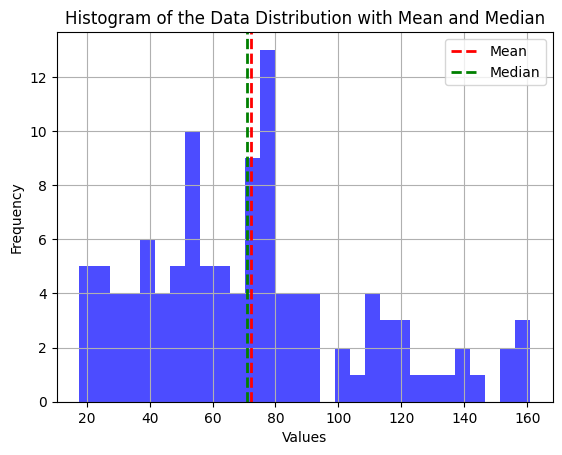

In [ ]:
plt.hist(y, bins=30, color='blue', alpha=0.7)
plt.axvline(np.mean(y), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(np.median(y), color='green', linestyle='dashed', linewidth=2, label='Median')

plt.title('Histogram of the Data Distribution with Mean and Median')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
mean_value = np.mean(y)
median_value = np.median(y)

In [ ]:
print(f'Mean: {mean_value}')
print(f'Median: {median_value}')

Mean: 72.3
Median: 70.8


In [ ]:
if mean_value > median_value:
    print('The distribution is skewed to the right.')
elif mean_value < median_value:
    print('The distribution is skewed to the left.')
else:
    print('The distribution is symmetric.')

The distribution is skewed to the right.


**Dividing the Data into Test and train**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Training the Data on Simple Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

**Visualizing the Training Set**

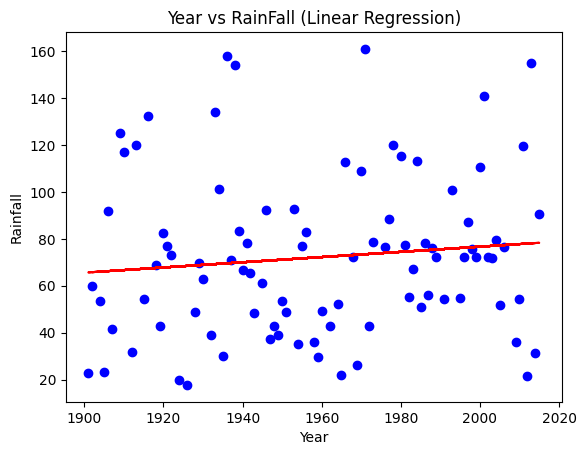

In [ ]:
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train,regressor.predict(X_train),color='red')
plt.title('Year vs RainFall (Linear Regression)')
plt.xlabel('Year')
plt.ylabel('Rainfall')
plt.show()

**Reporting MAE,MSE,RMSE**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, regressor.predict(X_test))

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, regressor.predict(X_test))

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)


In [ ]:
print(f'MAE: {mae}')

MAE: 29.1802802063777


In [ ]:
print(f'MSE: {mse}')

MSE: 1357.632528408134


In [ ]:
print(f'RMSE: {rmse}')

RMSE: 36.84606530429178


**Training the Data again and Calculate MAE,MSE,RMSE**

In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor_new=LinearRegression()
regressor_new.fit(X_train_new,y_train_new)

LinearRegression()

In [ ]:
# Mean Absolute Error (MAE)
mae_new = mean_absolute_error(y_test_new, regressor_new.predict(X_test_new))

# Mean Squared Error (MSE)
mse_new = mean_squared_error(y_test_new, regressor_new.predict(X_test_new))

# Root Mean Squared Error (RMSE)
rmse_new = np.sqrt(mse)

In [ ]:
print(f'MAE: {mae_new}')

MAE: 28.849711425208596


In [ ]:
print(f'MSE: {mse_new}')

MSE: 1239.3344262563926


In [ ]:
print(f'RMSE: {rmse_new}')

RMSE: 36.84606530429178


**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standard Scaling
scaler_standard = StandardScaler()
df_standard_scaled = pd.DataFrame(scaler_standard.fit_transform(df), columns=df.columns)

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(scaler_minmax.fit_transform(df), columns=df.columns)

# Print the scaled DataFrames
print("Original DataFrame:")
print(df)
print("\nDataFrame after Standard Scaling:")
print(df_standard_scaled)
print("\nDataFrame after Min-Max Scaling:")
print(df_minmax_scaled)

# Report the differences in range
range_standard_scaling = df_standard_scaled.max() - df_standard_scaled.min()
range_minmax_scaling = df_minmax_scaled.max() - df_minmax_scaled.min()

print("\nDifference in range after Standard Scaling:")
print(range_standard_scaling)
print("\nDifference in range after Min-Max Scaling:")
print(range_minmax_scaling)

Original DataFrame:
       YEAR  Rainfall in June
0    1901.0              22.7
1    1902.0              59.9
2    1903.0              26.2
3    1904.0              53.4
4    1905.0              23.1
..      ...               ...
110  2011.0             119.5
111  2012.0              21.7
112  2013.0             155.0
113  2014.0              31.3
114  2015.0              90.6

[115 rows x 2 columns]

DataFrame after Standard Scaling:
         YEAR  Rainfall in June
0   -1.717054         -1.420424
1   -1.686931         -0.355106
2   -1.656807         -1.320192
3   -1.626683         -0.541250
4   -1.596559         -1.408969
..        ...               ...
110  1.596559          1.351693
111  1.626683         -1.449061
112  1.656807          2.368327
113  1.686931         -1.174140
114  1.717054          0.524068

[115 rows x 2 columns]

DataFrame after Min-Max Scaling:
         YEAR  Rainfall in June
0    0.000000          0.034892
1    0.008772          0.294487
2    0.017544          